In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df.drop(columns = ["PassengerId","Name","Ticket","Cabin"],inplace = True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
mean = df["Age"].mean()

In [11]:
df["Age"].fillna(mean,inplace = True)

In [12]:
df["Embarked"].fillna("Unkonw",inplace = True)

In [13]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
df = pd.get_dummies(df)
df = df.astype(int)

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_Unkonw
0,0,3,22,1,0,7,1,0,1,0
1,1,1,38,1,0,71,0,0,0,0
2,1,3,26,0,0,7,0,0,1,0
3,1,1,35,1,0,53,0,0,1,0
4,0,3,35,0,0,8,1,0,1,0


In [26]:
X = df.drop(columns = ["Survived"])
y = df["Survived"]

In [28]:
X.shape

(891, 9)

In [29]:
y.shape

(891,)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
x_scaled = scaler.fit_transform(X)

In [33]:
X = pd.DataFrame(x_scaled,columns = X.columns)

In [34]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_Unkonw
0,0.827377,-0.580044,0.432793,-0.473674,-0.498948,0.737695,-0.307562,0.619306,-0.047431
1,-1.566107,0.650112,0.432793,-0.473674,0.789405,-1.355574,-0.307562,-1.614710,-0.047431
2,0.827377,-0.272505,-0.474545,-0.473674,-0.498948,-1.355574,-0.307562,0.619306,-0.047431
3,-1.566107,0.419458,0.432793,-0.473674,0.427056,-1.355574,-0.307562,0.619306,-0.047431
4,0.827377,0.419458,-0.474545,-0.473674,-0.478817,0.737695,-0.307562,0.619306,-0.047431


C:\Users\samee\desktop\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


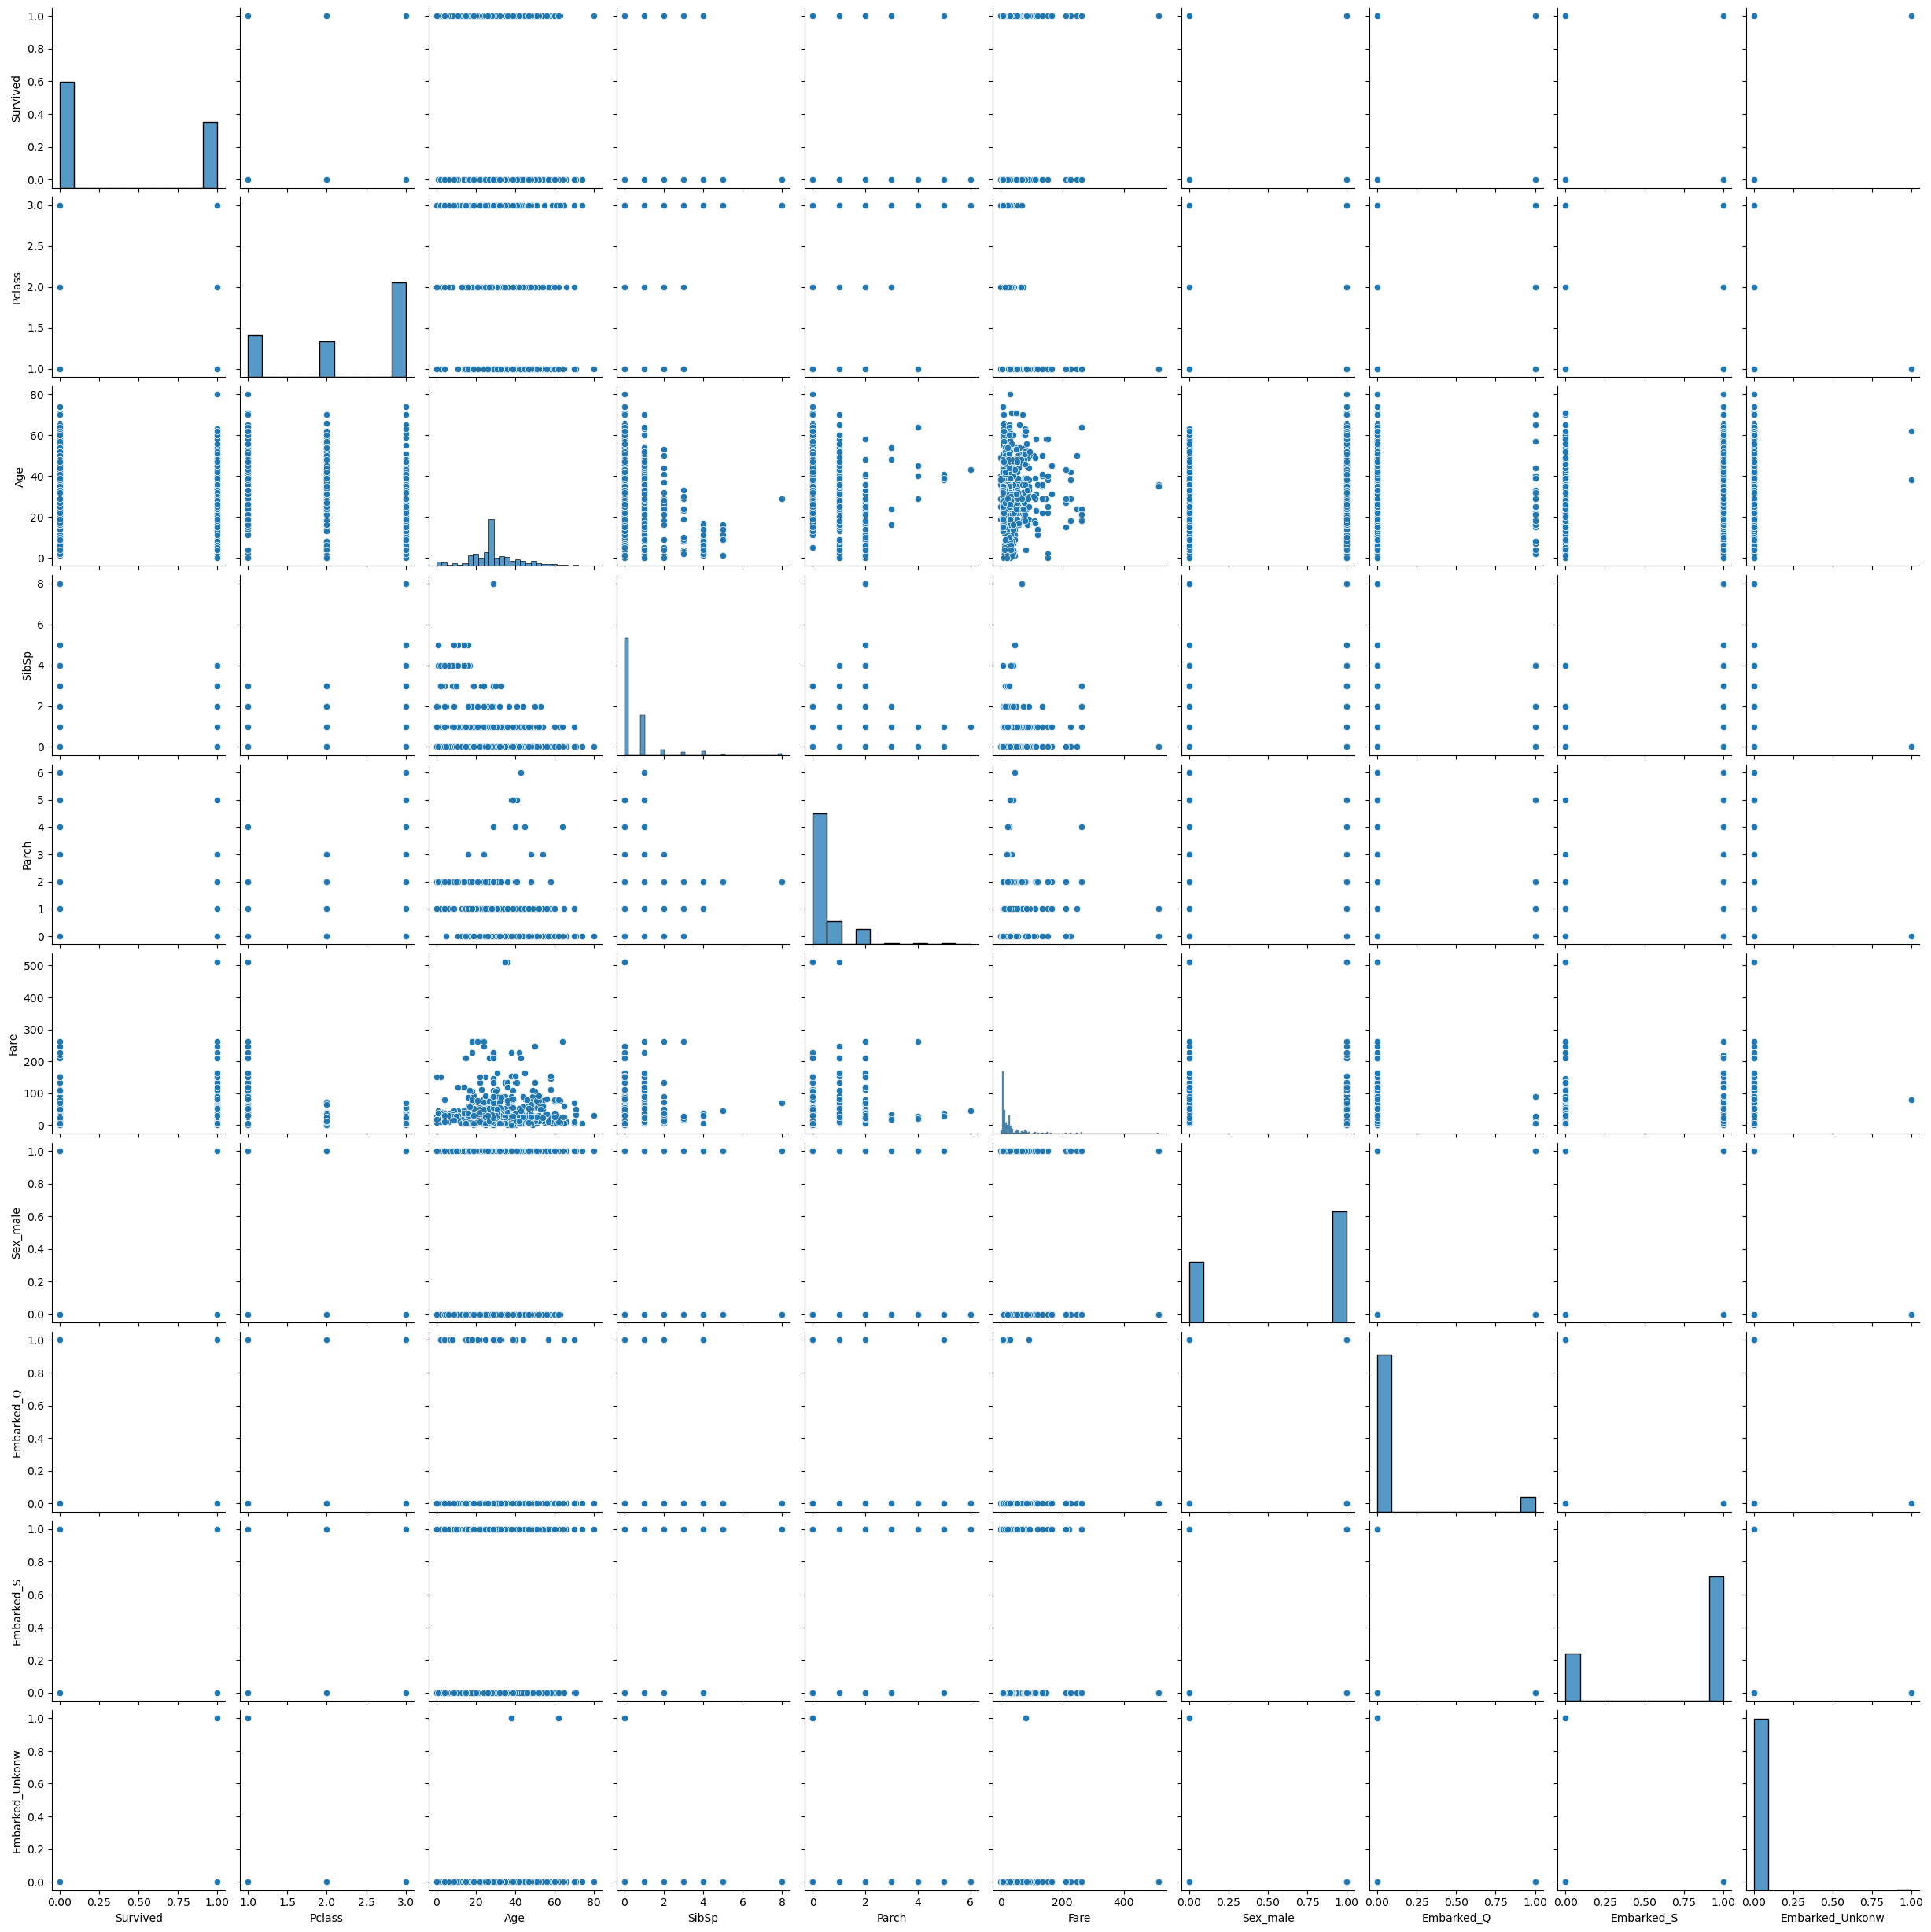

In [35]:
sns.pairplot(df)

<Axes: >

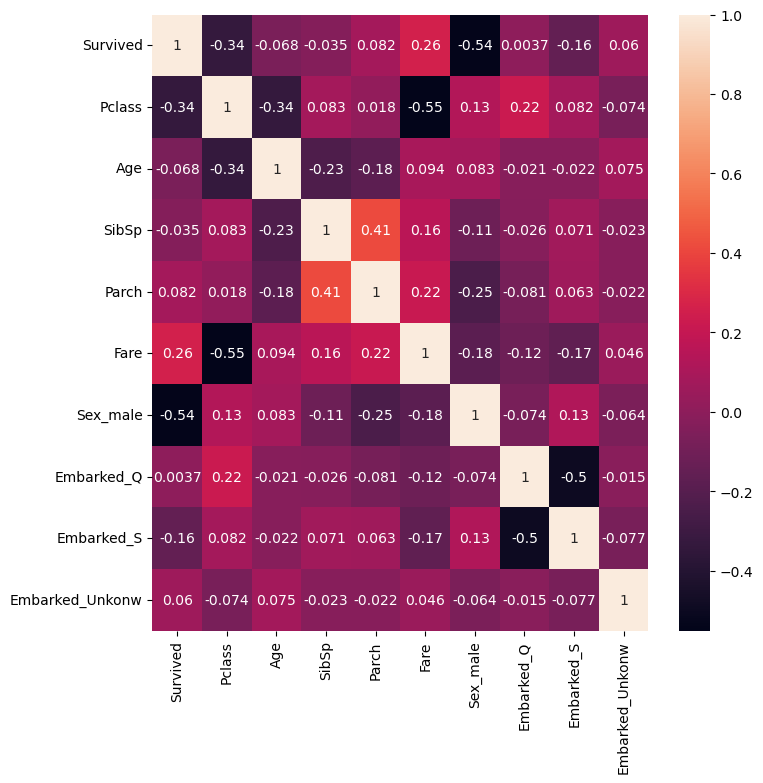

In [36]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot = True)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 60)

In [39]:
X_train.shape

(668, 9)

In [40]:
X_test.shape

(223, 9)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
model.score(X_train,y_train)

0.8158682634730539

In [46]:
y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
accuracy_score(y_test,y_pred)

0.7533632286995515

In [49]:
confusion_matrix(y_test,y_pred)

array([[108,  24],
       [ 31,  60]], dtype=int64)

<Axes: >

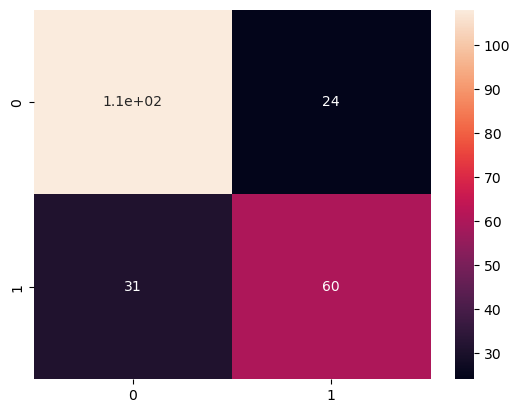

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       132
           1       0.71      0.66      0.69        91

    accuracy                           0.75       223
   macro avg       0.75      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223

